iteration 5000
BEST PARAMS: {'degree': 5, 'kernel': 'poly'}

0.758 (+/-0.214) for {'degree': 2, 'kernel': 'poly'}
0.88 (+/-0.198) for {'degree': 3, 'kernel': 'poly'}
0.927 (+/-0.128) for {'degree': 4, 'kernel': 'poly'}
0.93 (+/-0.111) for {'degree': 5, 'kernel': 'poly'}
MaxGlobal 0.9302545816924963
Number_Of_Estimators 5000
MaxGlobal_Score 0.9868
iteration 5001
BEST PARAMS: {'degree': 5, 'kernel': 'poly'}

0.801 (+/-0.205) for {'degree': 2, 'kernel': 'poly'}
0.925 (+/-0.109) for {'degree': 3, 'kernel': 'poly'}
0.957 (+/-0.062) for {'degree': 4, 'kernel': 'poly'}
0.959 (+/-0.064) for {'degree': 5, 'kernel': 'poly'}
iteration 5002
BEST PARAMS: {'degree': 4, 'kernel': 'poly'}

0.686 (+/-0.412) for {'degree': 2, 'kernel': 'poly'}
0.837 (+/-0.349) for {'degree': 3, 'kernel': 'poly'}
0.921 (+/-0.145) for {'degree': 4, 'kernel': 'poly'}
iteration 5003
BEST PARAMS: {'degree': 4, 'kernel': 'poly'}

0.8 (+/-0.121) for {'degree': 2, 'kernel': 'poly'}
0.932 (+/-0.02) for {'degree': 3, 'kernel': 'p

iteration 5033
BEST PARAMS: {'degree': 4, 'kernel': 'poly'}

0.852 (+/-0.062) for {'degree': 2, 'kernel': 'poly'}
0.947 (+/-0.04) for {'degree': 3, 'kernel': 'poly'}
0.96 (+/-0.049) for {'degree': 4, 'kernel': 'poly'}
iteration 5034
BEST PARAMS: {'degree': 4, 'kernel': 'poly'}

0.756 (+/-0.247) for {'degree': 2, 'kernel': 'poly'}
0.908 (+/-0.155) for {'degree': 3, 'kernel': 'poly'}
0.957 (+/-0.025) for {'degree': 4, 'kernel': 'poly'}
iteration 5035
BEST PARAMS: {'degree': 4, 'kernel': 'poly'}

0.73 (+/-0.509) for {'degree': 2, 'kernel': 'poly'}
0.935 (+/-0.132) for {'degree': 3, 'kernel': 'poly'}
0.959 (+/-0.093) for {'degree': 4, 'kernel': 'poly'}
iteration 5036
BEST PARAMS: {'degree': 5, 'kernel': 'poly'}

0.761 (+/-0.286) for {'degree': 2, 'kernel': 'poly'}
0.851 (+/-0.283) for {'degree': 3, 'kernel': 'poly'}
0.895 (+/-0.204) for {'degree': 4, 'kernel': 'poly'}
0.898 (+/-0.212) for {'degree': 5, 'kernel': 'poly'}
iteration 5037
BEST PARAMS: {'degree': 4, 'kernel': 'poly'}

0.78 (+/-

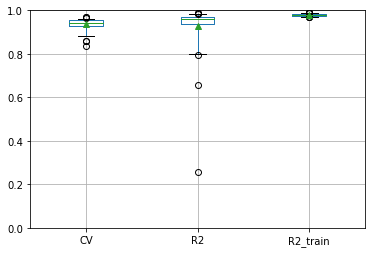

In [1]:
MaxGlobal=0
MaxGlobal_Score=0
MaxGlobal_Score_train=0

scores = {'CV': [], 'R2': [],'R2_train': []}





for j in range(5000,5051):

    print("iteration {0}".format(j))
     
    from sklearn.kernel_ridge import KernelRidge
    from sklearn.model_selection import cross_val_score
    from sklearn.ensemble import GradientBoostingRegressor
    import numpy as np
    import pandas as pd
    import pickle
    from sklearn import metrics
    from sklearn import preprocessing
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_predict
    import matplotlib.pyplot as plt
    #from neupy.algorithms import RBFKMeans
    #from neupy.algorithms import GRNN
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score
    from math import sqrt
    from sklearn.metrics import mean_absolute_error as mae
    from sklearn import svm
    from sklearn.neural_network import MLPRegressor
    from sklearn.neural_network import MLPClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn import linear_model
    import seaborn as sn
    import joblib
    import pandas as pd
    #from sklearn.linear_model import KernelRidge
    from sklearn.model_selection import GridSearchCV
    import warnings
    warnings.filterwarnings('ignore', category=FutureWarning)
    warnings.filterwarnings('ignore', category=DeprecationWarning)



    file_name = 'CA'
    dataset = pd.read_csv(file_name + '.csv', header=0)
    Test=dataset.loc[dataset['phi'] == 0.5]
    data= dataset[dataset.phi != 0.5]

    x1 = data.phi
    x2= data.ca
    X = np.column_stack((x1,x2))
    Y= np.asarray(data.uv).reshape(-1, 1)
    X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=j,stratify=X[:,0])


    xscaler = preprocessing.StandardScaler()
    X_train_standard=xscaler.fit_transform(X_train)
    X_test_standard=xscaler.transform(X_test)

    yscaler = preprocessing.StandardScaler()
    Y_train_standard =yscaler.fit_transform(Y_train)
    Y_test_standard =yscaler.transform(Y_test)

    Y_train_standard=Y_train_standard.ravel()
    Y_test_standard =Y_test_standard.ravel() 

    X1 = Test.phi
    X2= Test.ca
    XX = np.column_stack((X1,X2))
    YY= np.asarray(Test.uv).reshape(-1, 1)
    X_scaled=xscaler.transform(XX)
    Y_scaled=yscaler.transform(YY)
    Y_scaled=Y_scaled.ravel()




    def print_results_max(results):
        print('BEST PARAMS: {}\n'.format(results.best_params_))
        MAxMean=0
        means = results.cv_results_['mean_test_score']
        stds = results.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, results.cv_results_['params']):
            if mean > MAxMean :
                MAxMean = mean
                print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        return MAxMean


#'kernel' : [‘additive_chi2’, ‘chi2’, ‘linear’, ‘poly’, ‘polynomial’, ‘rbf’, ‘laplacian’, ‘sigmoid’, ‘cosine’]


    KernelRidge =KernelRidge()
    
    parameters = {
            'kernel' : [ 'poly','additive_chi2','chi2','rbf','laplacian'],      
            'degree' :list(np.arange(2,20,1))

    }
    cv = GridSearchCV(KernelRidge, parameters, cv=5)
    cv.fit(X_train_standard, Y_train_standard)  
    
    
    Score= cv.best_estimator_.score(X_test_standard, Y_test_standard).round(4)
    MAxMean=print_results_max(cv)
    Score_train= cv.best_estimator_.score(X_train_standard, Y_train_standard).round(4)

    scores['CV'].append(MAxMean) 
    scores['R2'].append(Score)
    scores['R2_train'].append(Score_train)

 
    if MAxMean > MaxGlobal and Score>MaxGlobal_Score  and Score_train>MaxGlobal_Score_train:
        MaxGlobal=MAxMean
        MaxGlobal_Score= Score
        MaxGlobal_Score_train = Score_train

        BestFit=cv.best_estimator_
        KernelRidge_X_train_standard=X_train_standard
        KernelRidge_Y_train_standard=Y_train_standard
        KernelRidge_X_test_standard=X_test_standard
        KernelRidge_Y_test_standard=Y_test_standard
        
        KernelRidgePoly_Y_train_standard_realscale=yscaler.inverse_transform(Y_train_standard.reshape(-1, 1))
        KernelRidgePoly_Y_test_standard_realscale=yscaler.inverse_transform(Y_test_standard.reshape(-1, 1))
        ypredtrain=BestFit.predict(X_train_standard)
        ypredtest=BestFit.predict(X_test_standard)
        KernelRidgePoly_pred_Y_train_standard_realscale=yscaler.inverse_transform(ypredtrain.reshape(-1, 1))
        KernelRidgePoly_pred_Y_test_standard_realscale=yscaler.inverse_transform(ypredtest.reshape(-1, 1))
        np.save('KernelRidgePoly_Y_train_standard_realscale',KernelRidgePoly_Y_train_standard_realscale)
        np.save('KernelRidgePoly_Y_test_standard_realscale',KernelRidgePoly_Y_test_standard_realscale)
        np.save('KernelRidgePoly_pred_Y_train_standard_realscale',KernelRidgePoly_pred_Y_train_standard_realscale)
        np.save('KernelRidgePoly_pred_Y_test_standard_realscale',KernelRidgePoly_pred_Y_test_standard_realscale)
        
        Number_Of_Estimators = j
        np.save('KernelRidgePoly_fulRun_X_train_standard',KernelRidge_X_train_standard)
        np.save('KernelRidgePoly_fulRun_Y_train_standard',KernelRidge_Y_train_standard)
        np.save('KernelRidgePoly_fulRun_X_test_standard',KernelRidge_X_test_standard)
        np.save('KernelRidgePoly_fulRun_Y_test_standard',KernelRidge_Y_test_standard)
        joblib.dump(BestFit, 'KernelRidge_modelPoly.pkl')
        print("MaxGlobal {0}".format(MaxGlobal))
        print("Number_Of_Estimators {0}".format(Number_Of_Estimators))
        print("MaxGlobal_Score {0}".format(MaxGlobal_Score))
        Xscaler=xscaler
        Yscaler=yscaler
        ypredTest=BestFit.predict(X_scaled)
        Testscore=r2_score(Y_scaled,ypredTest)

        
    
S=pd.DataFrame(scores) 
axis = S.boxplot(whis=(5,95),showmeans=True)
axis.set_ylim([0,1]);
np.save('KernelRidgePoly_CV',S.CV)
np.save('KernelRidgePoly_R2',S.R2)
np.save('KernelRidgePoly_R2_train',S.R2_train)

print("mean CV {0}".format(S.CV.mean()))
print("mean R2 {0}".format(S.R2.mean()))
print("mean R2_train {0}".format(S.R2_train.mean()))
print("Test Score {0}".format(Testscore))


print("test r2 = {}".format(r2_score(KernelRidgePoly_Y_test_standard_realscale,KernelRidgePoly_pred_Y_test_standard_realscale)))
print("test RMSE: {0} and MAE: {1}".format(sqrt(np.mean((KernelRidgePoly_Y_test_standard_realscale - KernelRidgePoly_pred_Y_test_standard_realscale)**2)),mae(KernelRidgePoly_Y_test_standard_realscale, KernelRidgePoly_pred_Y_test_standard_realscale).round(3)))

print("train r2 = {}".format(r2_score(KernelRidgePoly_Y_train_standard_realscale,KernelRidgePoly_pred_Y_train_standard_realscale)))
print("train RMSE: {0} and MAE: {1}".format(sqrt(np.mean((KernelRidgePoly_Y_train_standard_realscale - KernelRidgePoly_pred_Y_train_standard_realscale)**2)),mae(KernelRidgePoly_Y_train_standard_realscale, KernelRidgePoly_pred_Y_train_standard_realscale).round(3)))

In [2]:
Number_Of_Estimators #random state in train-test-split function

5000

r2 = 0.6322920495392004
RMSE: 2.4444333075353057 and MAE: 2.008


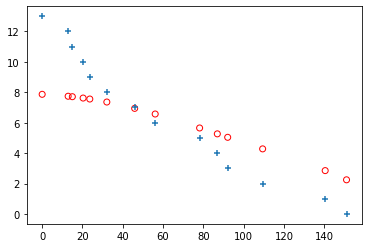

In [2]:
file_name = 'CA0.5'
data = pd.read_csv(file_name + '.csv', header=0)

x1 = data.phi
x2= data.ca
X = np.column_stack((x1,x2))
Y= np.asarray(data.uv).reshape(-1, 1)
X_scaled=Xscaler.transform(X)
Y_scaled=Yscaler.transform(Y)
Y_scaled=Y_scaled.ravel()
ypred=BestFit.predict(X_scaled)
actually_KernelRidgePoly=Yscaler.inverse_transform(ypred.reshape(-1,1))

from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_absolute_error as mae
np.save('actually_KernelRidgePoly',actually_KernelRidgePoly)
plt.scatter(x2,actually_KernelRidgePoly,color="none",edgecolor="red")
plt.scatter(x2,Y,marker='+')


print("r2 = {}".format(r2_score(Y,actually_KernelRidgePoly)))
print("RMSE: {0} and MAE: {1}".format(sqrt(np.mean((Y - actually_KernelRidgePoly)**2)),mae(Y, actually_KernelRidgePoly).round(3)))
